In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl

sys.path.insert(0, '../..')
import ccal

In [2]:
n_row = 20
n_column = 20
signal__feature_x_sample = pd.DataFrame(
    np.random.random_sample((n_row, n_column)),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

output_directory_path = ccal.clean_path('.')
print('Output directory path: {}'.format(output_directory_path))
assert os.path.isdir(output_directory_path)

max_n_job = 1

a_matrix_normalization_method = '0-1'
a_matrix_normalization_axis = 0
nmf_n_clustering = 10
nmf_parameters = '__'.join((str(parameter)
                            for parameter in (
                                'nmf',
                                a_matrix_normalization_axis,
                                a_matrix_normalization_method,
                                nmf_n_clustering, )))
print('NMF parameters: {}'.format(nmf_parameters))

nmf_ks = tuple(range(2, 4))

h_hcc_distance_function = 'euclidean'
h_hcc_n_clustering = 10
h_hcc_linkage_method = 'ward'
h_hcc_parameters = '__'.join((str(parameter)
                              for parameter in (
                                  'hcc',
                                  h_hcc_distance_function,
                                  h_hcc_n_clustering,
                                  h_hcc_linkage_method, )))
print('H HCC parameters: {}'.format(h_hcc_parameters))

h_hcc_ks = nmf_ks

Output directory path: /Users/k/Jumis/github_ccal/ccal/notebook/make_gps_map
NMF parameters: nmf__0__0-1__10
H HCC parameters: hcc__euclidean__10__ward


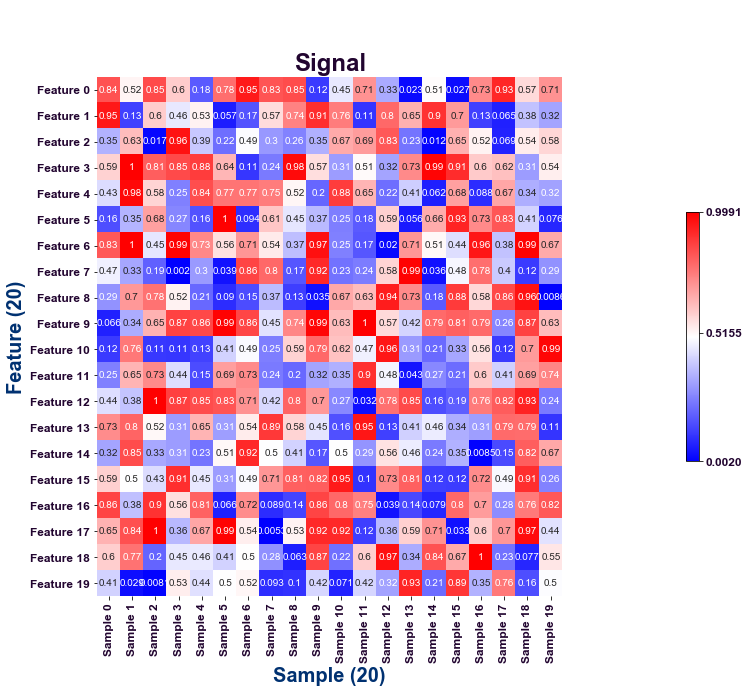

In [3]:
ccal.plot_heatmap(
    signal__feature_x_sample,
    title='Signal',
    decorate_ax_kwargs={
        'xlabel': 'Sample',
        'ylabel': 'Feature',
    })

Dropping 0 axis-0 slices ...
* ======= Dropped slices ======= *
[]
* ============================== *
Dropping 0 axis-1 slices ...
* ======= Dropped slices ======= *
[]
* ============================== *
Signal sum: 206.194
A sum: 204.856


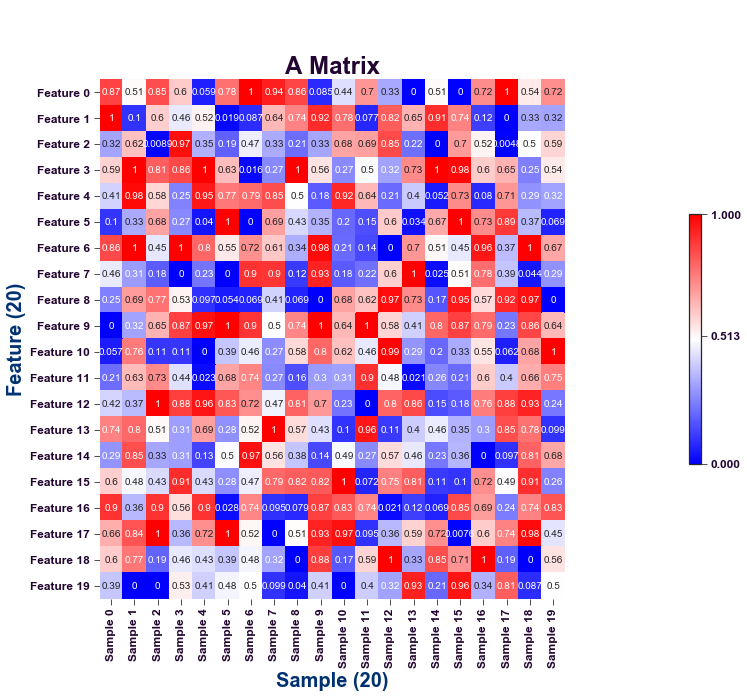

In [4]:
if a_matrix_normalization_method is None:
    a = signal__feature_x_sample.copy()

else:
    a = signal__feature_x_sample.values

    a = ccal.normalize_2d_array(a, a_matrix_normalization_method,
                                a_matrix_normalization_axis)

    a = pd.DataFrame(
        a,
        index=signal__feature_x_sample.index,
        columns=signal__feature_x_sample.columns)

a = ccal.drop_df_slices(a, 0, max_n_unique_object=1, print_dropped_slices=True)
a = ccal.drop_df_slices(a, 1, max_n_unique_object=1, print_dropped_slices=True)

print('Signal sum: {:.3f}'.format(signal__feature_x_sample.values.sum()))
print('A sum: {:.3f}'.format(a.values.sum()))

ccal.plot_heatmap(
    a,
    title='A Matrix',
    decorate_ax_kwargs={
        'xlabel': 'Sample',
        'ylabel': 'Feature',
    })

In [5]:
print('Axis 0 sum:')
print(a.sum().sort_values(ascending=False))

print('Axis 1 sum:')
print(a.sum(axis=1).sort_values(ascending=False))

Axis 0 sum:
Sample 18    11.715762
Sample 1     11.710843
Sample 9     11.610088
Sample 16    11.448739
Sample 6     11.055951
Sample 15    10.997403
Sample 2     10.777962
Sample 12    10.697876
Sample 3     10.683723
Sample 7     10.007249
Sample 17     9.913705
Sample 5      9.835503
Sample 0      9.731543
Sample 10     9.724589
Sample 4      9.703982
Sample 13     9.665570
Sample 19     9.509205
Sample 11     9.214623
Sample 8      8.937725
Sample 14     7.913479
dtype: float64
Axis 1 sum:
Feature 9     13.759380
Feature 3     12.566710
Feature 6     12.316772
Feature 12    12.165725
Feature 17    12.027647
Feature 0     11.522967
Feature 15    11.251200
Feature 4     10.600835
Feature 16    10.587948
Feature 13    10.268183
Feature 18     9.895936
Feature 1      9.842685
Feature 8      9.537814
Feature 11     8.786645
Feature 10     8.725455
Feature 5      8.594106
Feature 2      8.543263
Feature 14     8.399475
Feature 7      8.044092
Feature 19     7.418678
dtype: float64


NMFCC with K=2 ...
	(K=2) 10/10 - done.
NMFCC with K=3 ...
	(K=3) 10/10 - done.
Created directory /Users/k/Jumis/github_ccal/ccal/notebook/make_gps_map/nmf_k2_w_plot.
Created directory /Users/k/Jumis/github_ccal/ccal/notebook/make_gps_map/nmf_k2_h_plot.
Created directory /Users/k/Jumis/github_ccal/ccal/notebook/make_gps_map/nmf_k3_w_plot.
Created directory /Users/k/Jumis/github_ccal/ccal/notebook/make_gps_map/nmf_k3_h_plot.


/Users/k/Jumis/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


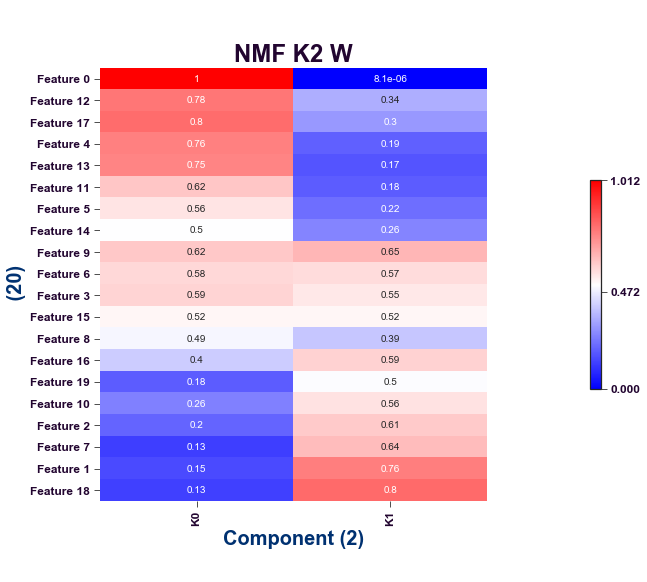

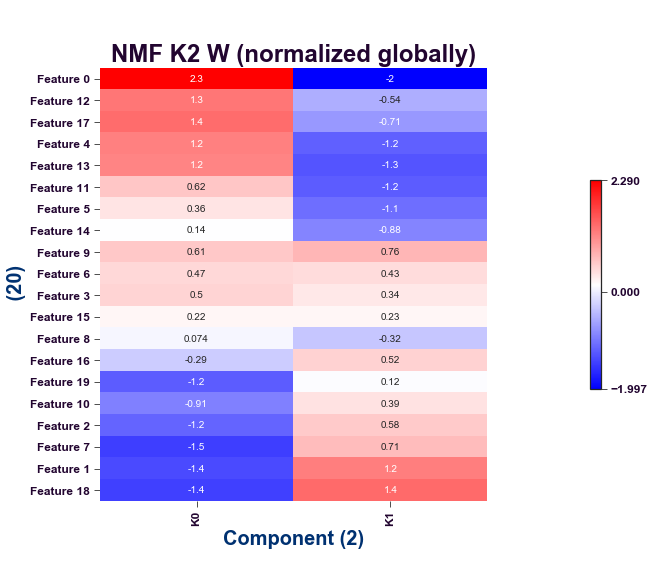

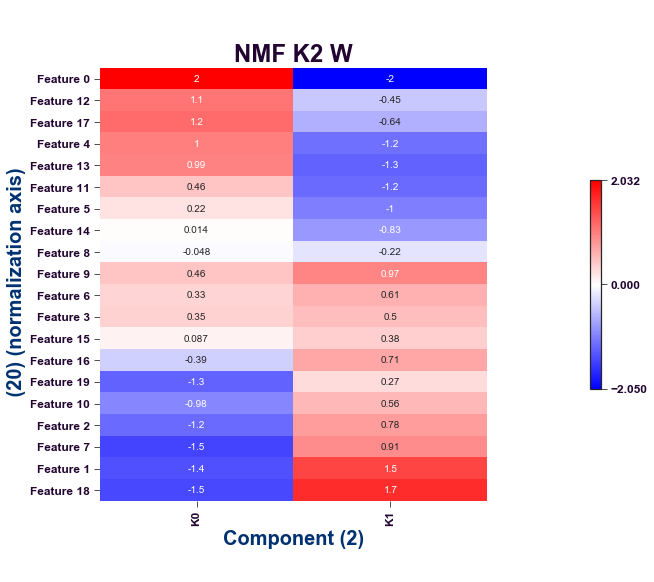

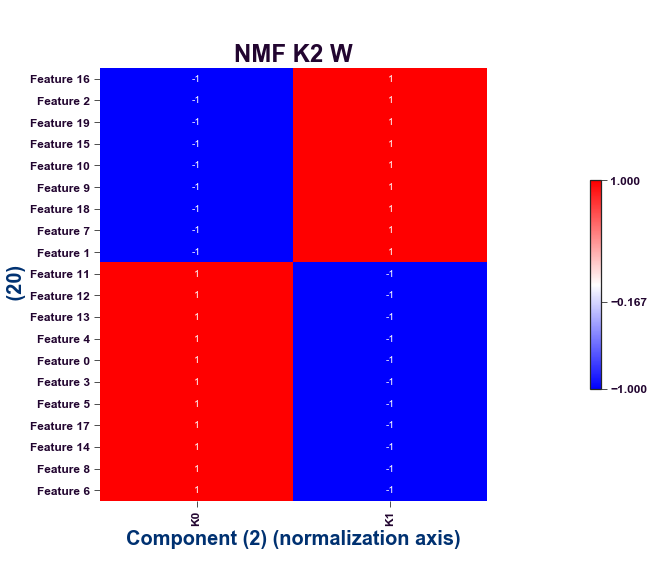

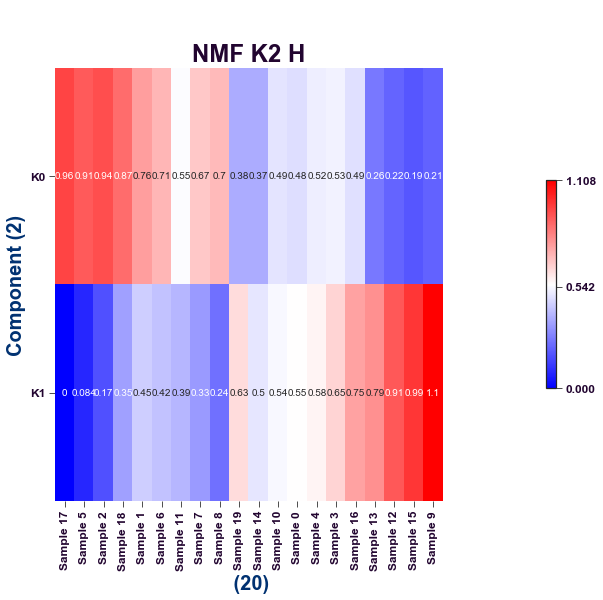

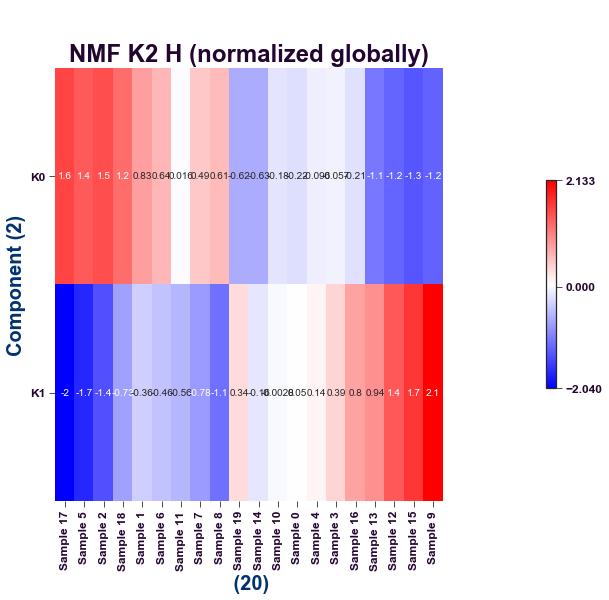

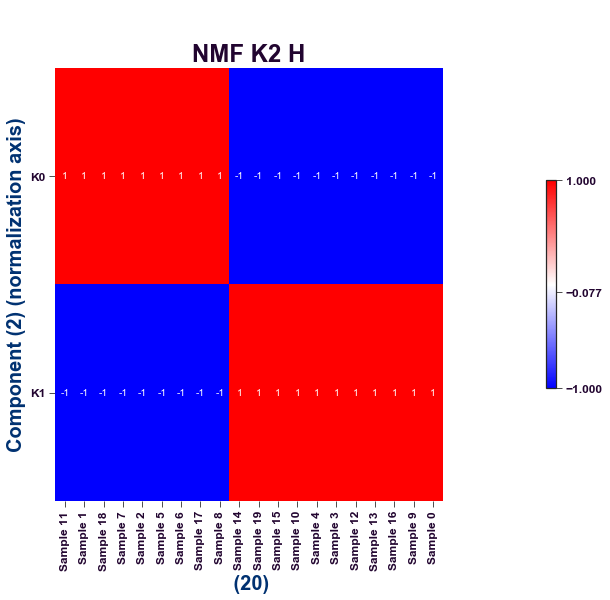

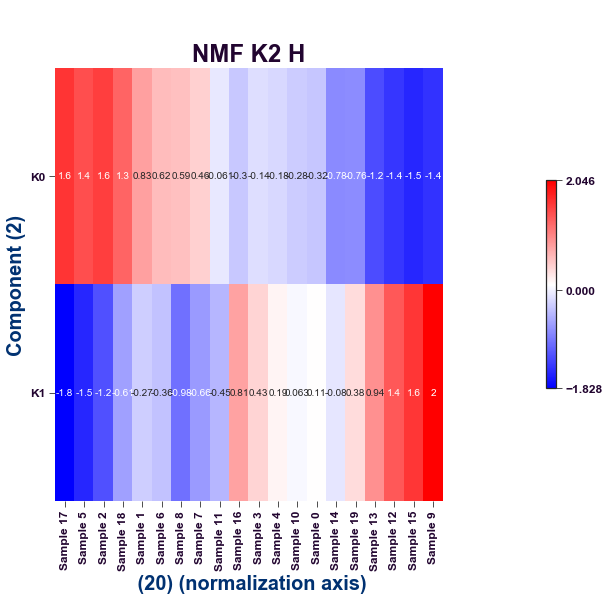

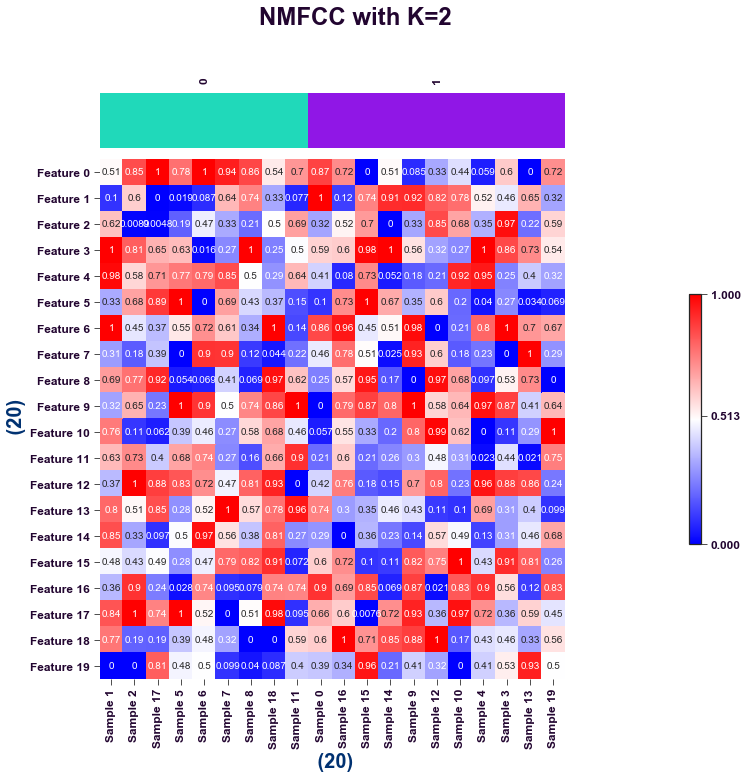

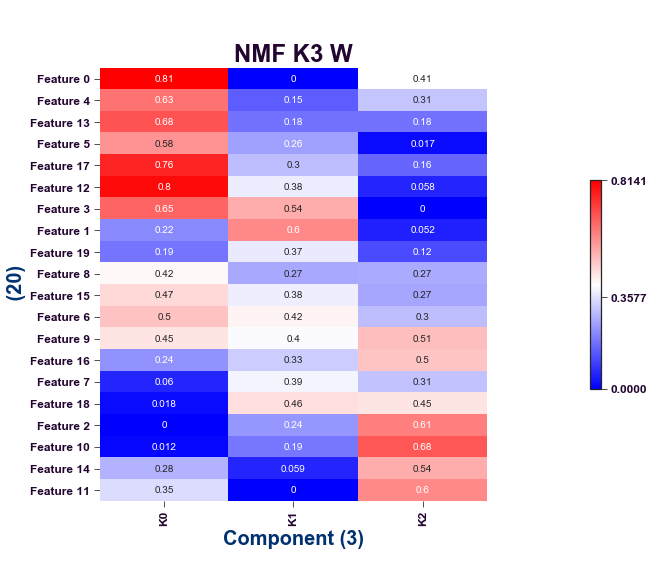

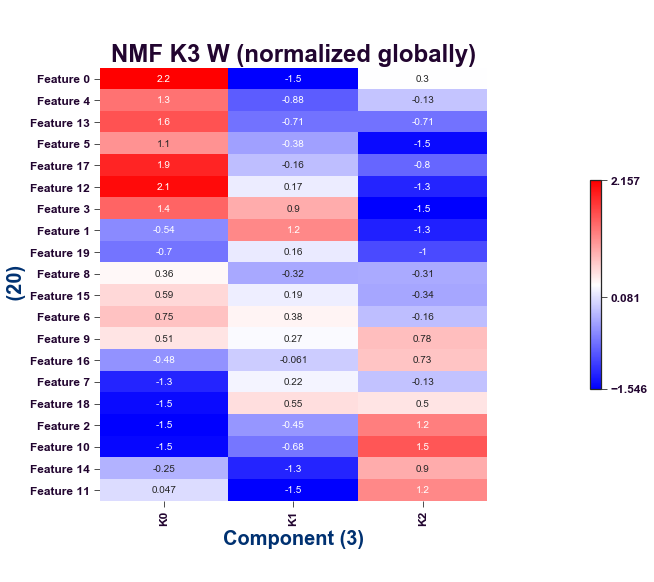

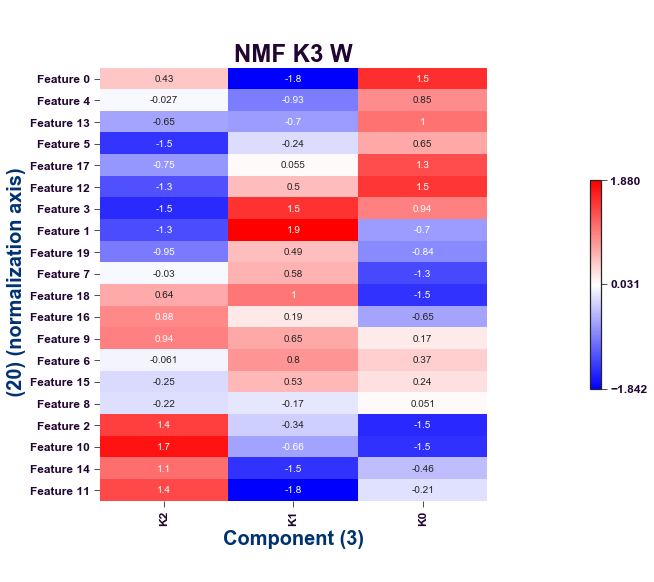

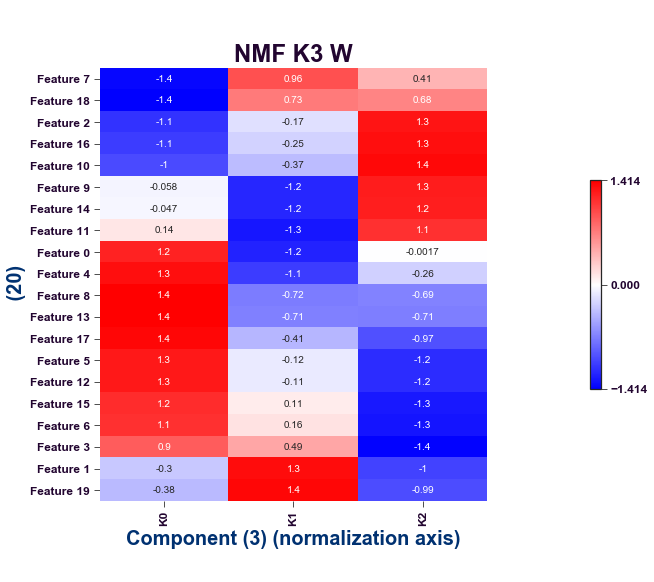

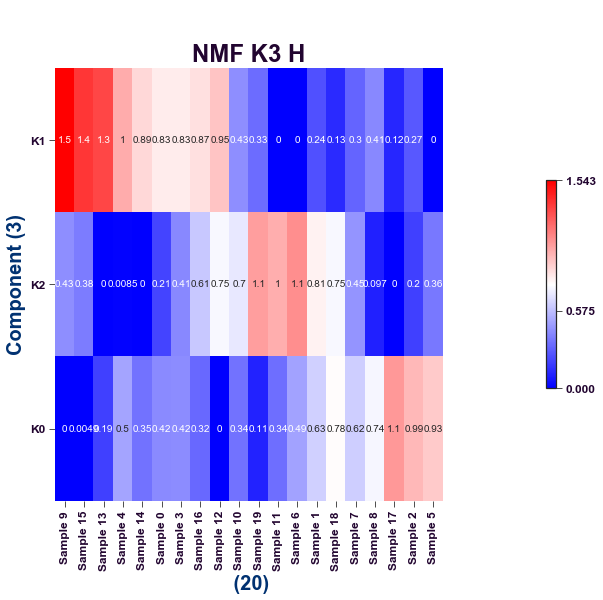

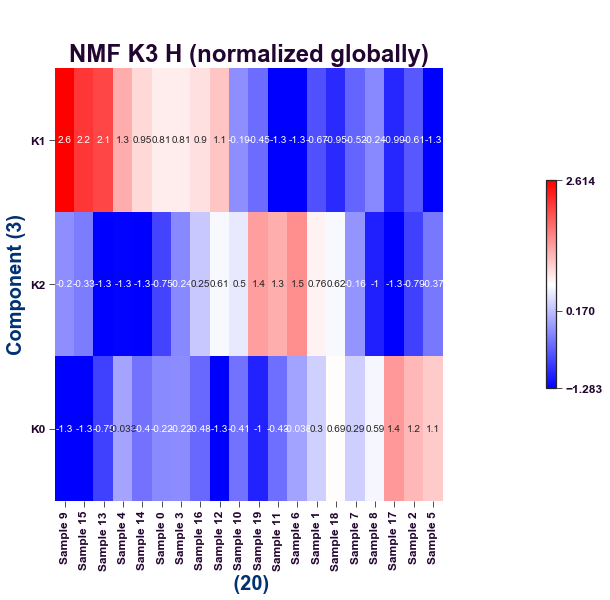

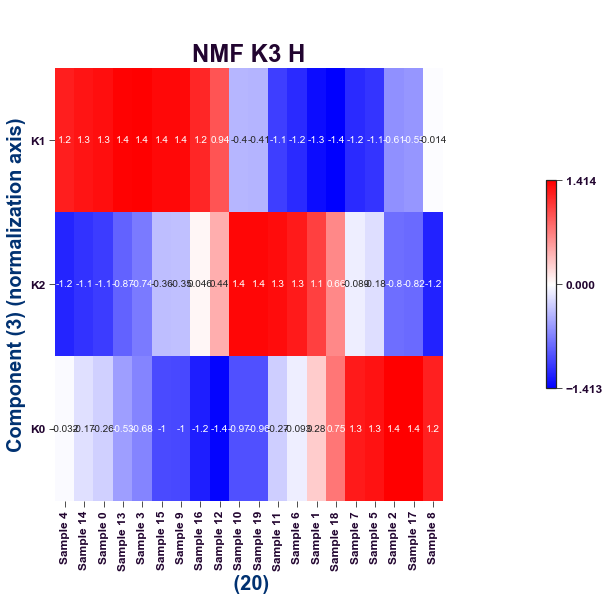

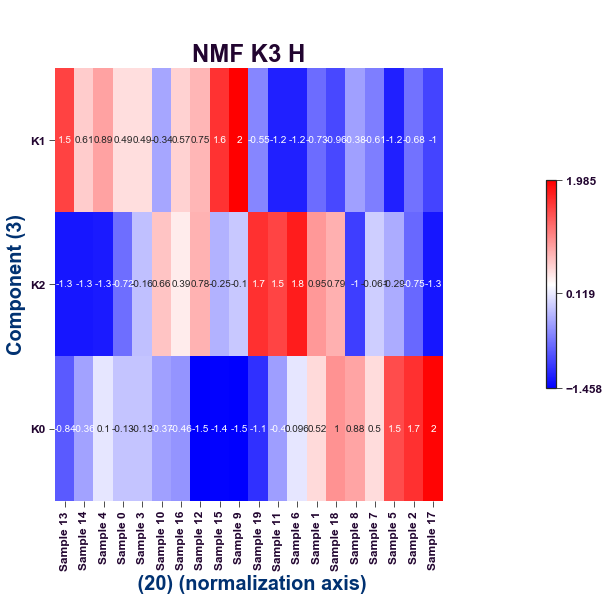

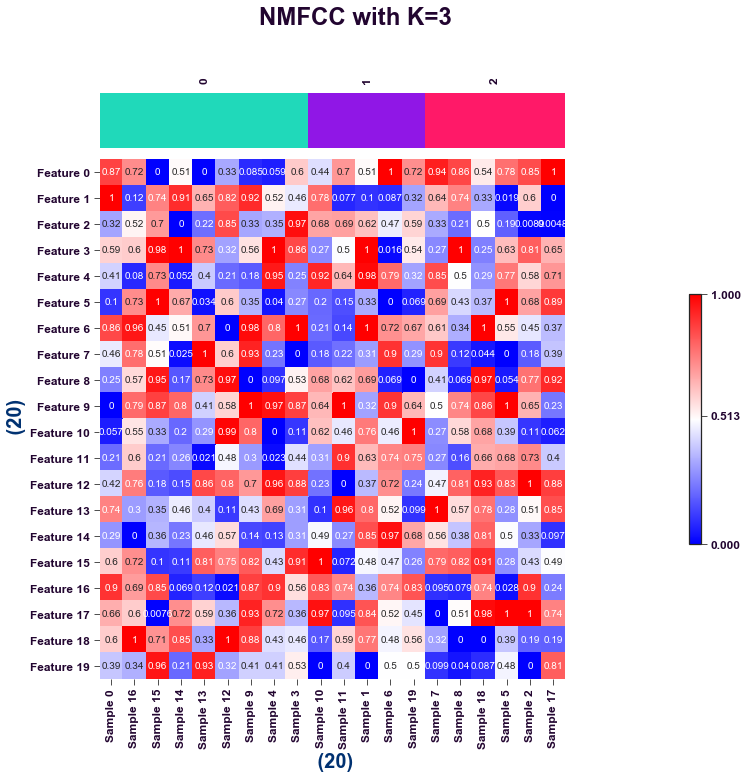

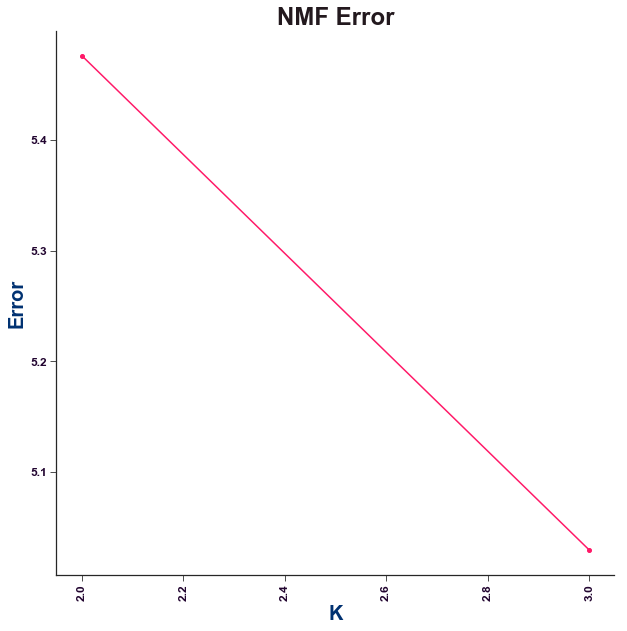

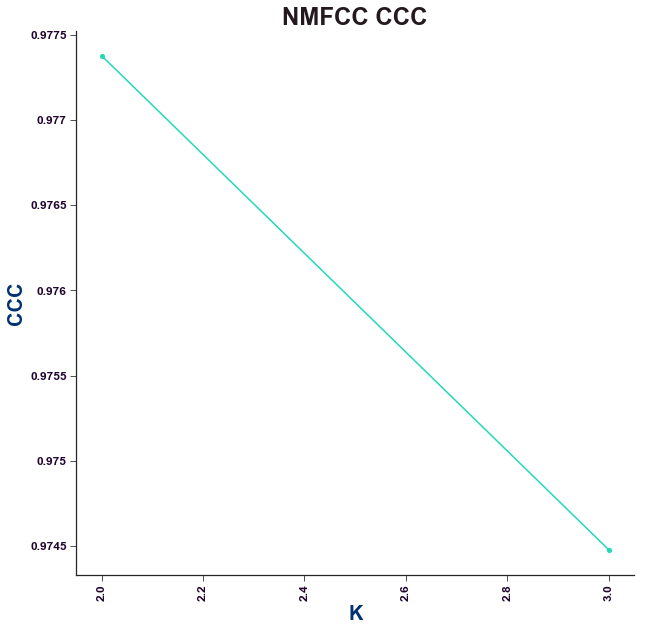

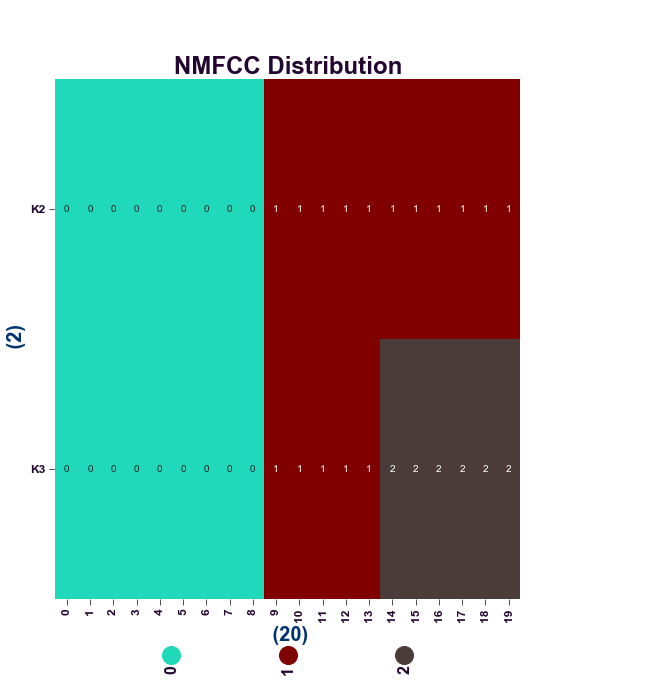

In [8]:
k_nmf, k_nmfcc_distance_linkage_ccc, nmfcc__k_x_column = ccal.nmf_consensus_cluster_with_multiple_k(
    a,
    nmf_ks,
    n_job=min(max(nmf_ks) - min(nmf_ks) + 1, max_n_job),
    n_clustering=nmf_n_clustering,
    plot_w=True,
    plot_h=True,
    plot_df=True,
    directory_path=output_directory_path)

In [9]:
nmf_k = 3

w = k_nmf['K{}'.format(nmf_k)]['w']
w.index.name = 'Feature'
w.columns.name = 'Component'

h = k_nmf['K{}'.format(nmf_k)]['h']
h.index.name = 'Component'
h.columns.name = 'Sample'

Applying <function compute_information_coefficient at 0x11b049c80> ...
	1/3 ...
	3/3 - done.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/k/Jumis/github_ccal/ccal/notebook/make_gps_map/w/component.comparison_panel.tsv'

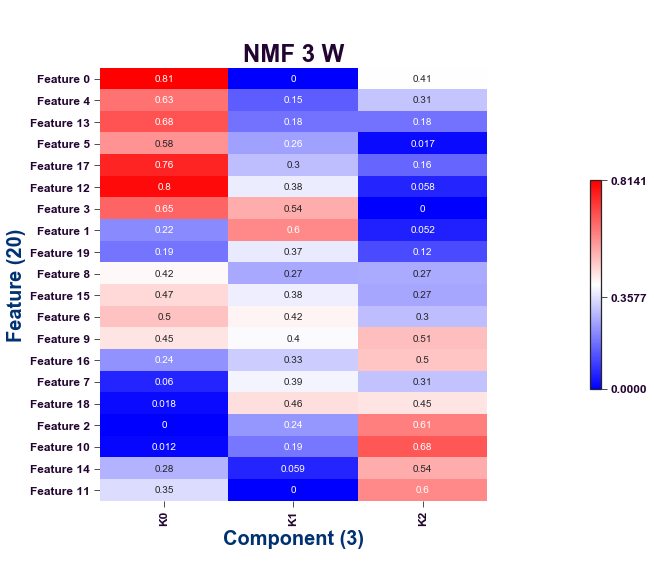

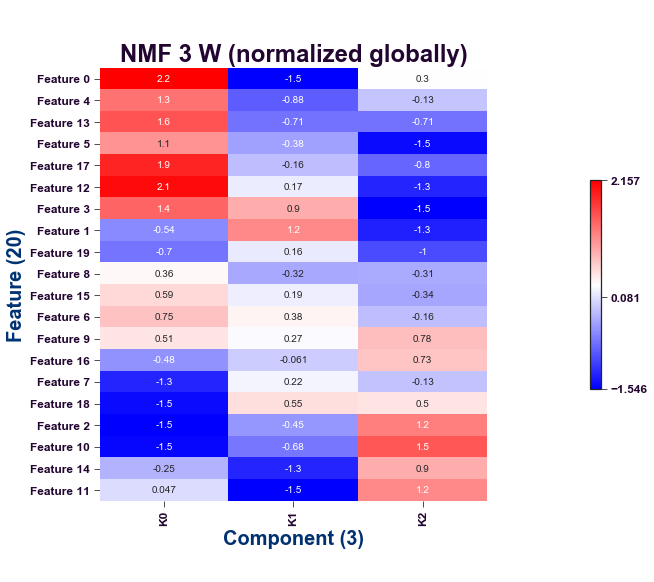

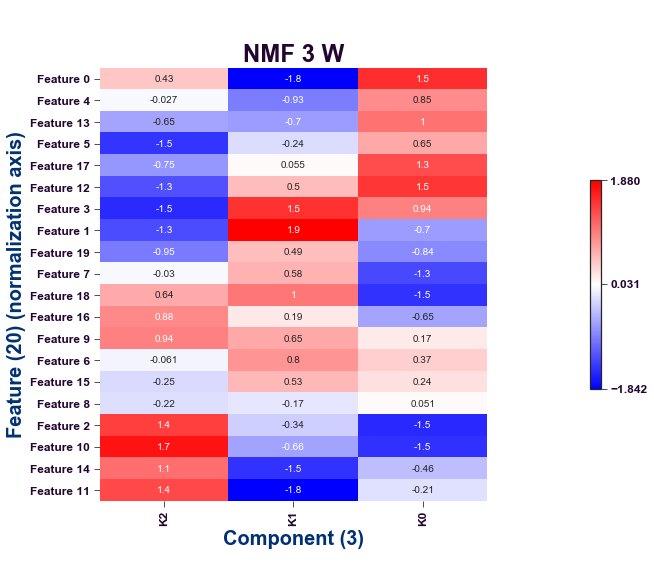

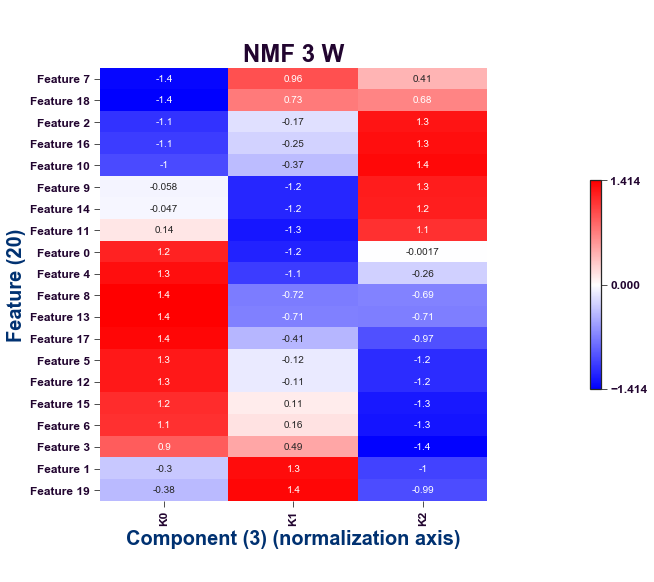

In [10]:
for matrix, w_or_h in (
    (
        w,
        'w', ),
    (
        h,
        'h', ), ):

    title = 'NMF {} {}'.format(nmf_k, w_or_h.title())

    ccal.normalize_and_plot_heatmap(
        matrix,
        title=title,
        decorate_ax_kwargs={
            'xlabel': matrix.columns.name,
            'ylabel': matrix.index.name,
        })

    ccal.make_comparison_panel(
        matrix,
        matrix,
        axis=(
            0,
            1, )[w_or_h == 'H'],
        title=title,
        array_2d_0_name='Component',
        array_2d_1_name='Component',
        file_path_prefix=os.path.join(output_directory_path, w_or_h,
                                      'component'))

In [ ]:
for component_name in w.columns:

    for maxtix, w_or_h in (
        (
            w,
            'w', ),
        (
            h,
            'h', ), ):

        for features, features_name in (
            (
                a,
                'a', ),
            (
                signal__feature_x_sample,
                'signal__feature_x_sample', ), ):

            if w_or_h == 'w':
                component = matrix[component_name]
                features = features.T
            elif w_or_h == 'H':
                component = matrix.loc[component_name]

            ccal.make_match_panel(
                component,
                features,
                n_job=max_n_job,
                n_top_feature=20,
                max_n_feature=None,
                n_sampling=0,
                n_permutation=0,
                title=title,
                file_path_prefix=os.path.join(
                    output_directory_path, w_or_h, 'match_a', '{}_vs_{}'.format(
                        component_name, features_name)))
            mpl.pyplot.show()

In [ ]:
gps_map = ccal.GPSMap(
    h, pull_power=2.2, mds_distance_function=h_hcc_distance_function)

gps_map.sample_marker_style.update({
    'markersize': 22,
})

gps_map.plot_samples()

In [ ]:
distance__column_x_column, k_hcc_distance_linkage, k_hcc_distance_linkage_ccc, hcc__k_x_column = ccal.explore_states(
    gps_map._node_x_sample,
    h_hcc_ks,
    n_job=max_n_job,
    distance_function=h_hcc_distance_function,
    n_clustering=h_hcc_n_clustering,
    linkage_method=h_hcc_linkage_method,
    plot_df=True,
    directory_path='{}/{}/{}/h/{}'.format(
        output_directory_path, nmf_parameters, nmf_k, h_hcc_parameters))

In [ ]:
for hcc_k, sample_state in hcc__k_x_column.iterrows():

    if sample_state.value_counts().min() < 3:
        print(
            'Skipping {}, who has at least 1 state with less than 3 samples ...'.
            format(hcc_k))

    else:
        hcc_k = int(hcc_k.strip('K'))

        gps_map.set_sample_phenotypes(
            sample_state,
            bandwidth_factor=2.2,
            phenotype_to_str={i: 'State {}'.format(i)
                              for i in range(hcc_k)})

        gps_map.plot_samples_with_phenotype(
            plot_heatmap_=True,
            plot_centroid=True,
            file_path='{}/{}/{}/h/{}/gps_map__hcc_k{}.png'.format(
                output_directory_path, nmf_parameters, nmf_k, h_hcc_parameters,
                hcc_k))

        mpl.pyplot.show()